In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80


In [4]:
df = df.drop([910, 911, 912, 913, 914, 915, 916, 917, 918])
df.fillna(0, inplace=True)

col = 0
for row in range(100):
  df.iloc[col:col + 10, 0] = df.iloc[col, 0]
  col = col + 10
df.head()

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80


In [5]:
test_df = df.loc[df['year'] == 10]
test_df

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,Sec_97,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
978,Sec_98,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
988,Sec_99,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
998,Sec_100,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


In [6]:
df.rename(columns={'Unnamed: 0': 'Group'},inplace = True)
test_df.rename(columns={'Unnamed: 0': 'Group'},inplace = True)

<ipython-input-6-a3afb6e3841e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.rename(columns={'Unnamed: 0': 'Group'},inplace = True)


In [7]:
predicted = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}
headers = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
regressor = RandomForestRegressor(n_estimators=10)

In [10]:
import math

In [11]:
rmse = []
n = 0
ind = 0
for col in [10, 11, 12, 13, 14]:
  res = 0
  count = 0
  for row in range(0, 1000, 10):
    x_train = df.iloc[row:row+9, 1:10]
    y_train = df.iloc[row:row+9, col]
    x_test = df.iloc[row+9, 1:10].to_numpy()
    y_test = df.iloc[row+9, col]
    regressor.fit(x_train, y_train)
    ypred = regressor.predict(x_test.reshape(1,-1))[0]
    predicted[headers[ind]].append(ypred)
    res += (y_test - ypred)**2
    count += 1
    n += 1
  rmse.append((res/count)**0.5)
  ind += 1

In [12]:
rmse

[70.11284278796573,
 68.75075894853815,
 28.058650377379173,
 14.572559830036726,
 0.522312102027131]

In [13]:
df_pred = pd.DataFrame.from_dict(predicted)
df_pred

,Para-9,Para-10,Para-11,Para-12,Para-13
0,2.56,52.22,34.2,7.2,1.91100
1,58.19,27.32,0.9,7.6,0.79250
2,65.84,0.00,0.0,9.8,1.33370
3,13.89,47.86,57.2,6.1,1.85700
4,0.00,236.14,33.7,6.0,1.61680
...,...,...,...,...,...
95,140.29,169.51,9.3,7.3,1.53660
96,5.04,56.53,20.9,12.0,1.07178
97,95.83,63.39,11.8,10.3,0.82090
98,119.33,273.68,138.2,10.3,2.02670


In [14]:
import random
generator = []
for i in range(25):
  generator.append(random.randint(0,100))

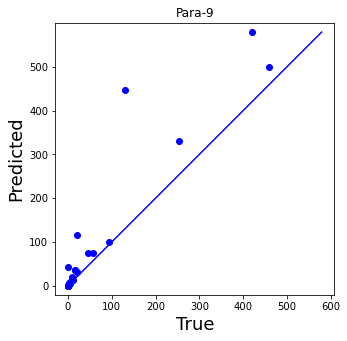

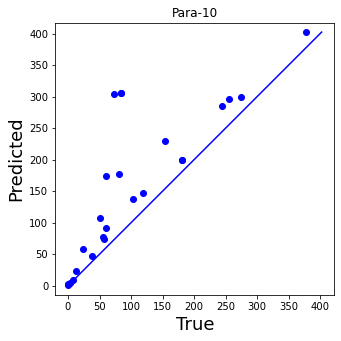

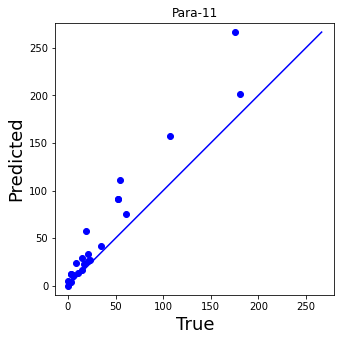

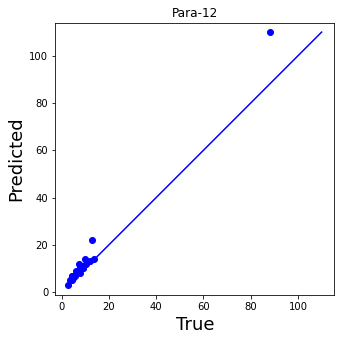

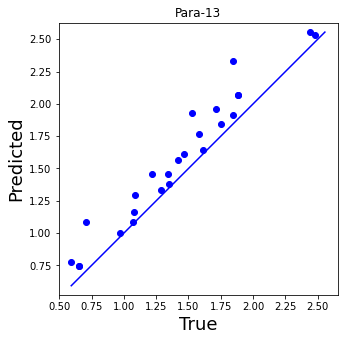

In [15]:
for i in range(5):
  plt.figure(figsize=(5, 5))
  true_value = df_pred.iloc[generator, i]
  predicted_value = test_df.iloc[generator, i + 10]
  plt.scatter(true_value, predicted_value, c='blue')

  p1 = max(max(predicted_value), max(true_value))
  p2 = min(min(predicted_value), min(true_value))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.title(headers[i])
  plt.xlabel('True', fontsize=18)
  plt.ylabel('Predicted', fontsize=18)
  plt.axis('equal')
  plt.show()

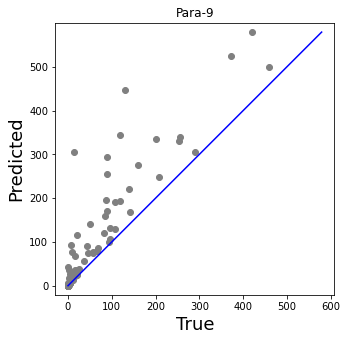

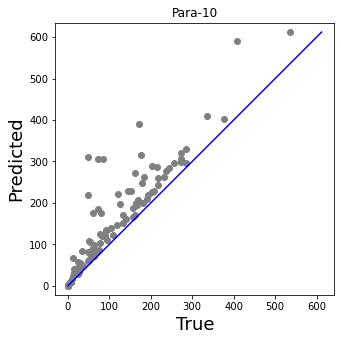

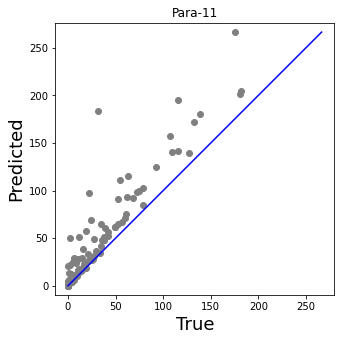

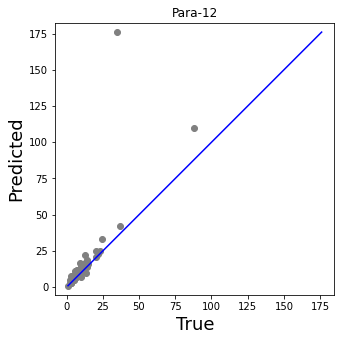

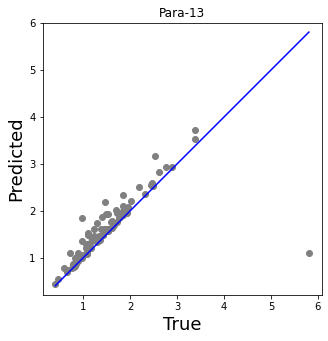

In [16]:
for i in range(5):
  plt.figure(figsize=(5, 5))
  true_value = df_pred.iloc[:, i]
  predicted_value = test_df.iloc[:, i + 10]
  plt.scatter(true_value, predicted_value, c='gray')

  p1 = max(max(predicted_value), max(true_value))
  p2 = min(min(predicted_value), min(true_value))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.title(headers[i])
  plt.xlabel('True', fontsize=18)
  plt.ylabel('Predicted', fontsize=18)
  plt.axis('equal')
  plt.show()